Name: Karma Yasser Ismail 

Project: Gold Price Predicition

 ***Data Science Intern associated by CodeClause***

In [206]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [207]:
# To Select file from your device 
from google.colab import files
uploaded = files.upload()

Saving GoldPrice.csv to GoldPrice (7).csv


In [208]:
# Read Data
data = pd.read_csv('GoldPrice.csv', na_values=['null'],index_col="Date", parse_dates=True)
data.head()

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [209]:
data.info() # Brief Information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2290 entries, 2008-01-02 to 2018-05-16
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 107.3 KB


In [210]:
data.isnull().values.any() # Check Nulls

False

In [211]:
data.duplicated().values.any() # Check Duplication

False

In [212]:
data.describe() # Analyze Data

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Text(0.5, 0, 'Date')

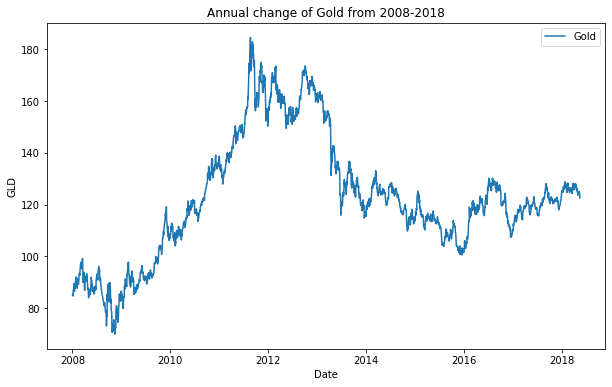

In [213]:
# Plot target var Annual Change
plt.figure(figsize=(10,6))
plt.title("Annual change of Gold from 2008-2018")
sns.lineplot(data=data['GLD'], label="Gold")
plt.xlabel("Date")

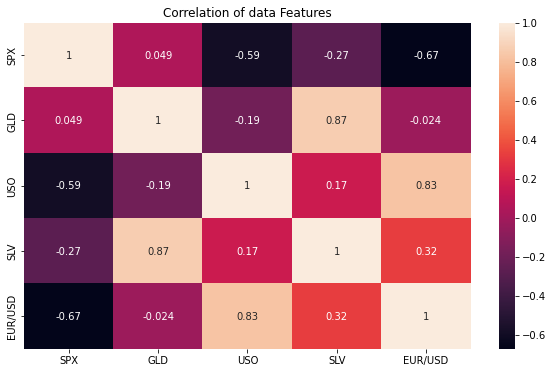

In [214]:
# Linear Relation aka Correlation
correlation = data.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation,  annot=True)
plt.title('Correlation of data Features')
plt.show()

In [215]:
# Close up on linear relation with target var
print (correlation['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


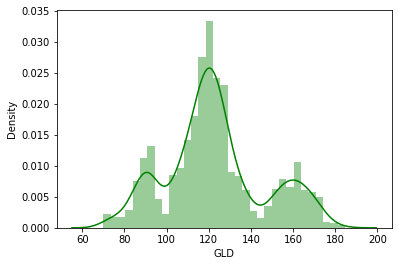

In [216]:
# Check data distribution of our target variable against the density distribution
sns.distplot(data['GLD'], color='green')

In [217]:
print('Skewness: %f', data['GLD'].skew()) # measures the symmetry of the distribution / outlier direction
print("Kurtosis: %f" % data['GLD'].kurt()) # where the most information is lying  /analyze the outliers in a given data.

Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


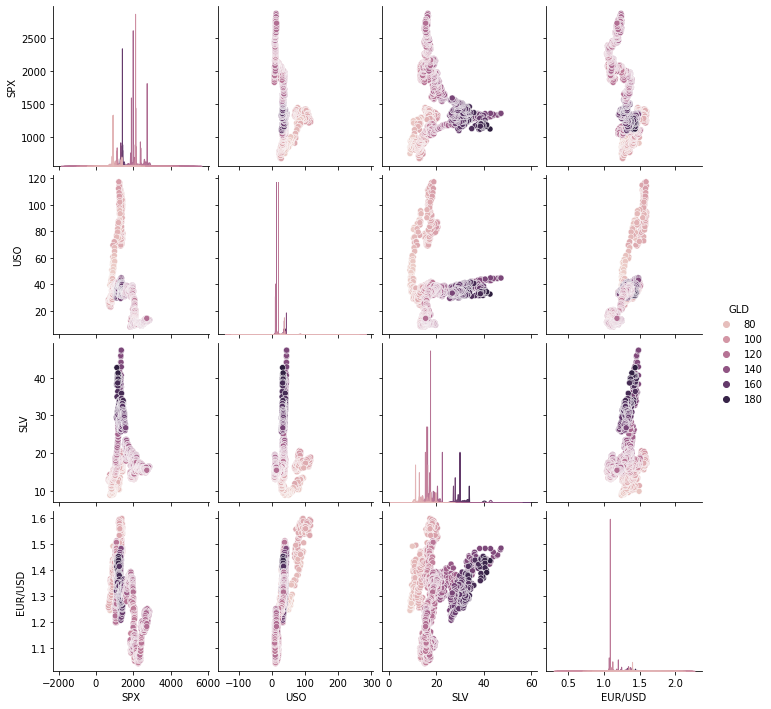

In [218]:
# Plot Gold against each feature density
sns.pairplot(data, hue ='GLD')

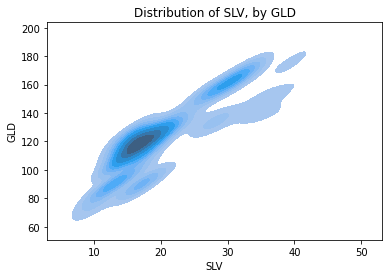

In [219]:
# SLV against gld density
sns.kdeplot(data=data,x='SLV', y='GLD',shade=True)
plt.title("Distribution of SLV, by GLD")
plt.show()

In [220]:
x = data.drop(['GLD'],axis=1)
y = data['GLD']

x

,SPX,USO,SLV,EUR/USD
Date,,,,
2008-01-02,1447.160034,78.470001,15.1800,1.471692
2008-01-03,1447.160034,78.370003,15.2850,1.474491
2008-01-04,1411.630005,77.309998,15.1670,1.475492
2008-01-07,1416.180054,75.500000,15.0530,1.468299
2008-01-08,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2018-05-08,2671.919922,14.060000,15.5100,1.186789
2018-05-09,2697.790039,14.370000,15.5300,1.184722
2018-05-10,2723.070068,14.410000,15.7400,1.191753


In [221]:
y

Date
2008-01-02     84.860001
2008-01-03     85.570000
2008-01-04     85.129997
2008-01-07     84.769997
2008-01-08     86.779999
                 ...    
2018-05-08    124.589996
2018-05-09    124.330002
2018-05-10    125.180000
2018-05-14    124.489998
2018-05-16    122.543800
Name: GLD, Length: 2290, dtype: float64

In [222]:
# Spliting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [223]:
# data Standardization
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

x_train

,SPX,USO,SLV,EUR/USD
0,-0.956097,0.392849,-0.496876,0.553834
1,-0.599759,2.235474,-0.447102,1.389399
2,0.738878,-1.067267,-0.994619,-1.474725
3,0.392311,-0.035762,-0.486978,-0.020735
4,0.708406,-0.431949,-0.529399,-0.329232
...,...,...,...,...
1827,-0.384888,0.117241,1.902752,0.170494
1828,0.702409,-0.949728,-0.922503,-1.519560
1829,-0.728399,0.212994,2.015875,1.083456
1830,-0.854582,0.171957,1.727411,0.774552


In [224]:
# Modeling
RFR = RandomForestRegressor(n_estimators = 100, random_state = 0)
RFR.fit(x_train, y_train)
y_pred = RFR.predict(x_test)


In [225]:
# Now Check the error for regression

print('Mean Absolute Error :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error :'," ", metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R Squared Error : ", metrics.r2_score(y_test, y_pred ))

Mean Absolute Error :   1.2967896737554594
Mean Square Error :   5.163021793194857
Root Mean Square Error :   2.272228376108981
R Squared Error :  0.9899639846953544


In [226]:
# Check the Training and Test set Accuracy
accuracy_train = RFR.score(x_train, y_train)
accuracy_test = RFR.score(x_test, y_test)
print("TRAIN :-" ,accuracy_train * 100, "%")
print("TEST :-" ,accuracy_test * 100 , "%")

TRAIN :- 99.84340132016783 %
TEST :- 98.99639846953544 %


In [227]:
y_test = list(y_test)

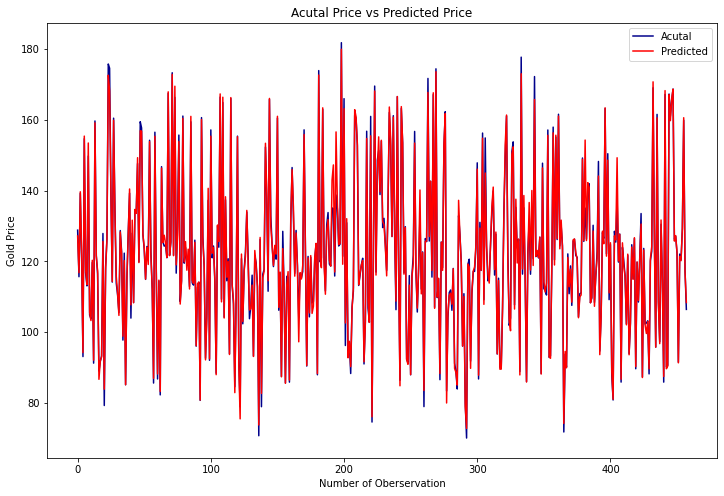

In [228]:
# Visualising the Accuracy of Predicted result
plt.figure(figsize=(12,8))
plt.plot(y_test, color = 'darkblue', label = 'Acutal')
plt.plot(y_pred, color = 'Red', label = 'Predicted')
plt.title('Acutal Price vs Predicted Price')
plt.xlabel('Number of Oberservation')
plt.ylabel('Gold Price')
plt.legend()
plt.show()